In [6]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [7]:
def plot_file(fname):
    i = 0
    with open(fname, "r") as input:
        for line in input:
            if not re.search('[a-zA-Z]', line):
                df.loc[i] = line.split()
                i = i + 1


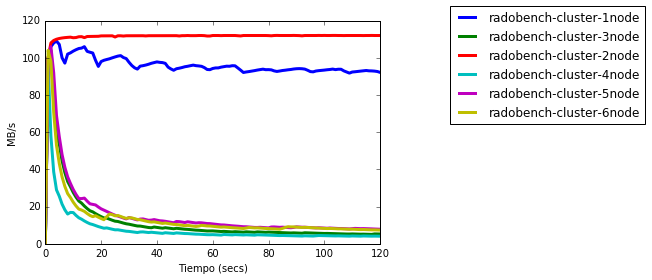

In [8]:
fnames = glob.glob("radobench*")
fig = plt.figure()
ax = fig.add_subplot(111)

for fname in fnames:
    df = pd.DataFrame(columns=("sec", "Cur ops", "started", "finished", "avg MB/s", "cur MB/s", "last lat(s)", "avg lat(s)"))
    plot_file(fname)
    ax.plot(df['avg MB/s'], markersize=10, linewidth=3.0, label=fname)

ax.set_xlim(0, 120)
ax.set_ylabel("MB/s")
ax.set_xlabel("Tiempo (secs)")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))    

In [15]:
df = pd.read_table("bench-ng-width.csv", sep=(","))
df

,width,seconds,total_iops,avg_iops,avg_lat
0,64,5.00008,1987,397.393,2.39226
1,64,5.00008,3963,395.194,2.40864
2,64,5.00008,5935,394.394,2.41801
3,64,5.00008,7869,386.794,2.46030
4,64,5.00008,9782,382.594,2.49424
5,64,5.00008,11684,380.394,2.50581
6,64,5.00013,13607,384.590,2.48447
7,64,5.00008,15559,390.394,2.43834
8,64,5.00008,17463,380.794,2.51115
9,64,5.00008,19430,393.394,2.42318


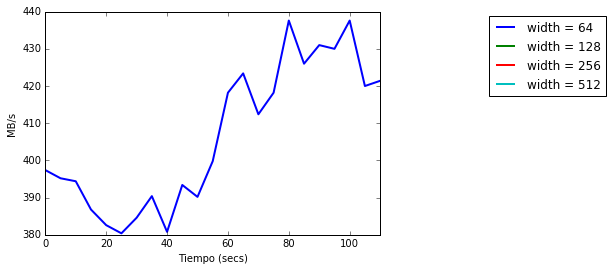

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
width64 = df[df['width'] == 64]
width128 = df[df['width'] == 128]
width256 = df[df['width'] == 256]
width512 = df[df['width'] == 512]
width1024 = df[df['width'] == 1024]
width2048 = df[df['width'] == 2048]
width4096 = df[df['width'] == 4096]
width8192 = df[df['width'] == 8192]
width16384 = df[df['width'] == 16384]

ax.plot(range(0, len(width64['avg_iops'])*5, 5), width64['avg_iops'], linewidth=2.0, label="width = 64")
ax.plot(range(0, len(width128['avg_iops'])*5, 5), width128['avg_iops'], linewidth=2.0, label="width = 128")
ax.plot(range(0, len(width256['avg_iops'])*5, 5), width256['avg_iops'], linewidth=2.0, label="width = 256")
ax.plot(range(0, len(width512['avg_iops'])*5, 5), width512['avg_iops'], linewidth=2.0, label="width = 512")

ax.set_xlim(0, 110)
ax.set_ylabel("MB/s")
ax.set_xlabel("Tiempo (secs)")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))

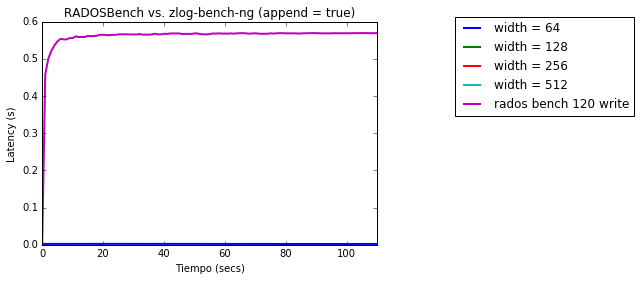

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.read_table("bench-ng-w.csv", sep=(","))
width64 = df[df['width'] == 64]
width128 = df[df['width'] == 128]
width256 = df[df['width'] == 256]
width512 = df[df['width'] == 512]
ax.plot(range(0, len(width64['avg_lat'])*5, 5), width64['avg_lat']/1000, linewidth=2.0, label="width = 64")
ax.plot(range(0, len(width128['avg_lat'])*5, 5), width128['avg_lat']/1000, linewidth=2.0, label="width = 128")
ax.plot(range(0, len(width256['avg_lat'])*5, 5), width256['avg_lat']/1000, linewidth=2.0, label="width = 256")
ax.plot(range(0, len(width512['avg_lat'])*5, 5), width512['avg_lat']/1000, linewidth=2.0, label="width = 512")

df = pd.DataFrame(columns=("sec", "Cur ops", "started", "finished", "avg MB/s", "cur MB/s", "last lat(s)", "avg lat(s)"))
plot_file("radosbench-cluster-default")
ax.plot(df['avg lat(s)'], markersize=10, linewidth=2.0, label="rados bench 120 write")

ax.set_xlim(0, 110)
ax.set_ylabel("Latency (s)")
ax.set_xlabel("Tiempo (secs)")
ax.set_title("RADOSBench vs. zlog-bench-ng (append = true)")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))